In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install -U statsmodels

Requirement already up-to-date: statsmodels in /Users/avik/anaconda3/lib/python3.7/site-packages (0.10.2)
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install -U scikit-learn

     |████████████████████████████████| 10.9MB 4.0MB/s eta 0:00:01    |███████████████████████▎        | 8.0MB 4.0MB/s eta 0:00:01
  Found existing installation: scikit-learn 0.21.3
    Uninstalling scikit-learn-0.21.3:
      Successfully uninstalled scikit-learn-0.21.3
Note: you may need to restart the kernel to use updated packages.


In [5]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [6]:
def parser(x):
	return datetime.strptime(x, '%Y-%m-%d')

series = read_csv('AAPL.csv', header=0, parse_dates=[0], index_col=0, usecols=[0, 2], squeeze=True, date_parser=parser)

Date
2010-01-01    30.798571
2010-02-01    29.309999
2010-03-01    33.925713
2010-04-01    38.922855
2010-05-01    38.268570
Name: High, dtype: float64


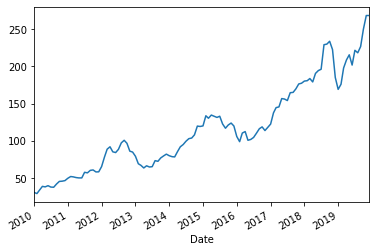

In [7]:
print(series.head())
series.plot()
pyplot.show()

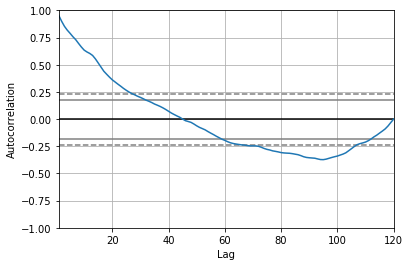

In [8]:
autocorrelation_plot(series)
pyplot.show()

/Users/avik/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/avik/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.High   No. Observations:                  119
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -409.863
Method:                       css-mle   S.D. of innovations              7.567
Date:                Wed, 04 Dec 2019   AIC                            833.726
Time:                        16:29:30   BIC                            853.180
Sample:                             1   HQIC                           841.626
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.9098      0.719      2.656      0.009       0.500       3.319
ar.L1.D.High     0.2698      0.091      2.966      0.004       0.092       0.448
ar.L2.D.High    -0.0815      0.093     -0.87

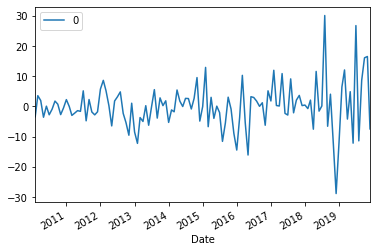

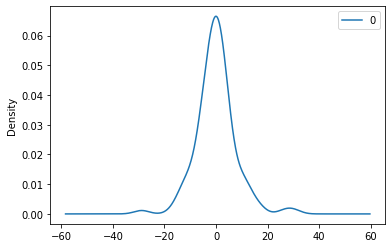

                0
count  119.000000
mean     0.005799
std      7.601254
min    -28.857107
25%     -3.654199
50%      0.044804
75%      2.996593
max     30.128368


In [9]:
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

[ 30.798571  29.309999  33.925713  38.922855  38.26857   39.85857
  37.998573  37.754284  42.104286  45.57143   45.900002  46.665714
  49.799999  52.128571  51.667141  50.732857  50.261429  50.304287
  57.785713  57.07143   60.408573  60.957142  58.285713  58.441429
  65.46286   78.230003  88.778572  92.        85.251427  84.285713
  88.552856  97.267143 100.724289  96.678574  86.14286   84.941429
  79.285713  69.277145  67.135712  63.607143  66.535713  64.918571
  65.334282  73.391426  72.559998  77.035713  79.761429  82.162857
  80.028572  78.741432  78.428574  85.632858  92.024284  95.050003
  99.440002 102.900002 103.739998 108.040001 119.75     119.25
 120.       133.600006 130.279999 134.539993 132.970001 131.389999
 132.970001 122.57     116.889999 121.220001 123.82     119.860001
 105.849998  98.889999 110.419998 112.389999 100.730003 101.889999
 104.550003 110.230003 116.18     118.690002 113.769997 118.019997
 122.440002 137.479996 144.5      145.460007 156.649994 155.979996


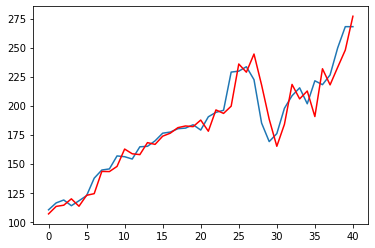

In [10]:
X = series.values
print(X)
print(len(X))
size = int(len(X) * 0.66)
print(int(len(X)*0.66))
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
print(history)
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

Test MSE: 65.774


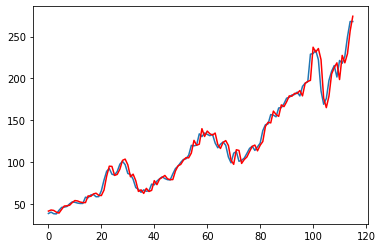

In [11]:
X = series.values
# print(X)
# print(len(X))
size = int(len(X) * 0.04)
# print(int(len(X)*0.66))
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
# print(history)
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(1,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
# 	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

Test MSE: 148.383


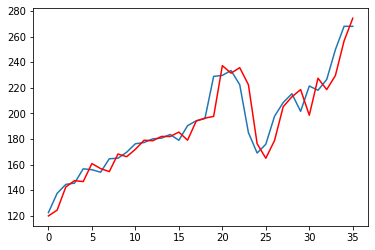

In [12]:
X = series.values
# print(X)
# print(len(X))
size = int(len(X) * 0.70)
# print(int(len(X)*0.66))
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
# print(history)
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(1,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
# 	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

Test MSE: 6344.940


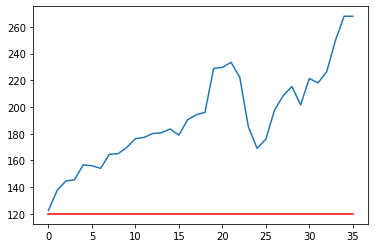

In [22]:
# Experimental Code

X = series.values
# print(X)
# print(len(X))
size = int(len(X) * 0.70)
# print(int(len(X)*0.66))
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
observe = [x for x in history]
# print(history)
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(1,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	observe.append(obs)
# 	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

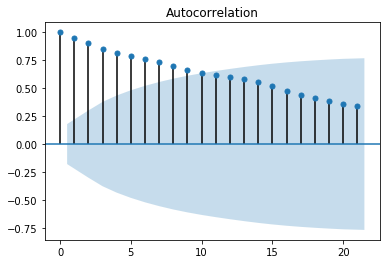

In [13]:
series = read_csv('AAPL.csv', header=0, parse_dates=[0], index_col=0, usecols=[0, 2], squeeze=True, date_parser=parser)
plot_acf(series)
pyplot.show()

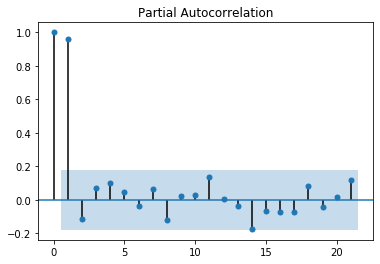

In [33]:
series = read_csv('AAPL.csv', header=0, parse_dates=[0], index_col=0, usecols=[0, 2], squeeze=True, date_parser=parser)
plot_pacf(series)
pyplot.show()

In [71]:
train, test = X[0:size], X[size:len(X)]

In [73]:
model = ARIMA(train, order=(1,1,0))
model_fit = model.fit(disp=0)
output = model_fit.predict(1, 4,'levels')
print(output)

[2.89506478 4.32407603 2.33415447 2.20981367]


In [69]:
model = ARIMA(train, order=(1,1,0))
model_fit = model.fit(disp=0)
output = model_fit.predict(1, 4,'levels')
print(output)

[2.89506478 4.32407603 2.33415447 2.20981367]


In [ ]:
"Why does 0.04 work better than 0.66 when 0.04 has less data to train with?"